<a href="https://colab.research.google.com/github/aizatbite/CDS503-Feature-Selection-Exploration/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection

In this code, we will be exploring different types of Feature Selection method that may or may not improve the accuracy of our algorithm

There are two types of feature selection that we will do:
1. Filter Approach
   - Variance Threshold
   - Correlation Coefficient
   - Chi-Squared
   - Information Gain
   
2. Wrapper Approach
   - PCA
   - Factor Analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
rain = pd.read_csv('weatherAUS.csv')
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
rain_new=rain.iloc[0:100000]
rain_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2010-03-28,MountGambier,10.7,19.0,1.6,0.6,0.1,NW,43.0,NNW,...,72.0,93.0,1010.9,1007.1,8.0,8.0,17.8,17.8,Yes,Yes
99996,2010-03-29,MountGambier,15.2,21.1,10.8,0.4,8.6,SW,31.0,SW,...,87.0,48.0,1016.0,1017.4,7.0,2.0,16.4,20.7,Yes,No
99997,2010-03-30,MountGambier,6.9,21.6,0.0,2.6,10.3,S,31.0,WNW,...,94.0,46.0,1024.9,1023.7,1.0,3.0,13.2,20.7,No,No
99998,2010-03-31,MountGambier,4.3,22.5,0.0,3.6,10.3,SSE,28.0,NaN,...,99.0,45.0,1023.6,1020.5,1.0,1.0,11.6,21.2,No,No


In [ ]:
rain_new = rain_new.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date', 'Location'],  axis = 1)
rain_new.dropna(inplace=True)

In [ ]:
rain_new.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
Q1 = rain_new.quantile(0.25)
Q3 = rain_new.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
rain_new = rain_new[~((rain_new < (Q1 - 1.5 * IQR)) |(rain_new > (Q3 + 1.5 * IQR))).any(axis=1)]
rain_new

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,10.3,20.5,0.4,S,35.0,ENE,S,6.0,22.0,88.0,81.0,1017.4,1017.9,15.0,19.1,No,No
99994,11.2,17.9,0.0,E,39.0,ESE,E,15.0,26.0,82.0,94.0,1020.8,1016.6,14.5,16.2,No,Yes
99995,10.7,19.0,1.6,NW,43.0,NNW,N,17.0,28.0,72.0,93.0,1010.9,1007.1,17.8,17.8,Yes,Yes
99997,6.9,21.6,0.0,S,31.0,WNW,S,4.0,19.0,94.0,46.0,1024.9,1023.7,13.2,20.7,No,No


In [ ]:
le = preprocessing.LabelEncoder()

rain_new['RainToday'] = le.fit_transform(rain_new['RainToday'])
rain_new['RainTomorrow'] = le.fit_transform(rain_new['RainTomorrow'])
rain_new['WindGustDir'] = le.fit_transform(rain_new['WindGustDir'])
rain_new['WindDir9am'] = le.fit_transform(rain_new['WindDir9am'])
rain_new['WindDir3pm'] = le.fit_transform(rain_new['WindDir3pm'])
rain_new

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,10.3,20.5,0.4,8,35.0,1,8,6.0,22.0,88.0,81.0,1017.4,1017.9,15.0,19.1,0,0
99994,11.2,17.9,0.0,0,39.0,2,0,15.0,26.0,82.0,94.0,1020.8,1016.6,14.5,16.2,0,1
99995,10.7,19.0,1.6,7,43.0,6,3,17.0,28.0,72.0,93.0,1010.9,1007.1,17.8,17.8,1,1
99997,6.9,21.6,0.0,8,31.0,14,8,4.0,19.0,94.0,46.0,1024.9,1023.7,13.2,20.7,0,0


In [ ]:
target = rain_new['RainTomorrow']
features = rain_new.drop('RainTomorrow', axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [ ]:
x_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
99587,7.1,27.3,0.0,8,39.0,0,0,28.0,24.0,57.0,21.0,1026.2,1022.8,15.0,26.3,0
22079,13.9,19.8,0.0,13,28.0,15,13,15.0,20.0,73.0,70.0,1021.1,1019.9,18.1,19.3,0
43573,17.8,25.2,0.0,5,22.0,10,4,9.0,15.0,81.0,81.0,1022.5,1017.7,19.5,21.0,0
94486,20.9,30.7,0.0,4,37.0,9,1,11.0,28.0,67.0,69.0,1014.9,1011.5,27.8,28.2,0
79133,13.5,27.8,0.0,3,56.0,4,3,13.0,22.0,54.0,42.0,1015.5,1009.7,20.7,26.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78380,15.3,23.0,0.0,11,50.0,10,12,15.0,26.0,63.0,49.0,1016.3,1014.6,15.9,21.8,0
88057,16.6,29.5,0.0,9,37.0,10,9,13.0,30.0,60.0,56.0,1014.2,1010.7,24.5,27.4,0
73669,10.9,21.0,0.0,8,50.0,11,12,33.0,31.0,70.0,47.0,1011.0,1010.0,14.3,18.6,0
74865,14.8,33.5,0.0,10,35.0,10,2,22.0,20.0,73.0,23.0,1020.1,1017.7,18.3,31.8,0


### Variance Threshold

In [ ]:
# Import normalizer module
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.Normalizer()
# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(x_train)
# View the first 5 rows of scaled_features array
scaled_features[0:5]

array([[4.89067752e-03, 1.88049995e-02, 0.00000000e+00, 5.51062256e-03,
        2.68642850e-02, 0.00000000e+00, 0.00000000e+00, 1.92871789e-02,
        1.65318677e-02, 3.92631857e-02, 1.44653842e-02, 7.06875108e-01,
        7.04533094e-01, 1.03324173e-02, 1.81161717e-02, 0.00000000e+00],
       [9.60030934e-03, 1.36752608e-02, 0.00000000e+00, 8.97870658e-03,
        1.93387526e-02, 1.03600461e-02, 8.97870658e-03, 1.03600461e-02,
        1.38133947e-02, 5.04188908e-02, 4.83468816e-02, 7.05242868e-01,
        7.04414065e-01, 1.25011222e-02, 1.33299259e-02, 0.00000000e+00],
       [1.22918162e-02, 1.74018971e-02, 0.00000000e+00, 3.45275736e-03,
        1.51921324e-02, 6.90551472e-03, 2.76220589e-03, 6.21496325e-03,
        1.03582721e-02, 5.59346693e-02, 5.59346693e-02, 7.06088881e-01,
        7.02774233e-01, 1.34657537e-02, 1.45015809e-02, 0.00000000e+00],
       [1.45344981e-02, 2.13497173e-02, 0.00000000e+00, 2.78172213e-03,
        2.57309297e-02, 6.25887478e-03, 6.95430531e-04, 7.649

In [ ]:
names = x_train.columns
# After normalization, scaled_features is transformed into an array so we need to convert i
scaled_features_df = pd.DataFrame(scaled_features, columns = names)
# Compute the variance of each column
scaled_features_df.var()

MinTemp          1.893122e-05
MaxTemp          1.993046e-05
Rainfall         7.814817e-08
WindGustDir      1.054583e-05
WindGustSpeed    6.277353e-05
WindDir9am       9.734116e-06
WindDir3pm       1.033420e-05
WindSpeed9am     2.623120e-05
WindSpeed3pm     3.207043e-05
Humidity9am      1.250088e-04
Humidity3pm      1.676730e-04
Pressure9am      8.558225e-07
Pressure3pm      5.740691e-07
Temp9am          1.816524e-05
Temp3pm          1.863000e-05
RainToday        2.613336e-08
dtype: float64

In [ ]:
# Import VarianceThreshold module
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object with a variance threshold of 0.1
thresholder = VarianceThreshold(threshold = 0.00005)
# Conduct variance thresholding - fit_transform() takes in an array
features_high_variance = thresholder.fit_transform(scaled_features)
# Use the get_support() function to identify the feature(s) above the variance threshold
thresholder.get_support(indices = True) 

array([ 4,  9, 10], dtype=int64)

As shown above, the three column return is WindGustSpeed, Humidity9am and Humidity3pm
I believe that the variance is too low is due to our data is a mix of categorical and numerical data.

For variance threshold to work well, we need to ensure that our feature is mainly continuous variable 

### Correlation Coefficient

In [ ]:
# Place the x_train and y_train data frames side by side
x = pd.concat([x_train, y_train], axis = 1)
# Generate correlation matrix
cor = x.corr()
# Print correlation matrix
cor

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.715019,0.007485,-0.194386,0.192579,-0.063413,-0.236001,0.180194,0.196645,-0.258900,0.115008,-0.454654,-0.440634,0.911746,0.687803,0.012390,0.088027
MaxTemp,0.715019,1.000000,-0.194668,-0.210840,0.116067,-0.206983,-0.200902,-0.015483,0.052169,-0.446455,-0.423364,-0.399796,-0.467916,0.850803,0.983008,-0.125484,-0.093372
Rainfall,0.007485,-0.194668,1.000000,0.080140,0.068135,0.100261,0.072263,0.069240,0.053474,0.258165,0.251174,-0.047997,0.007682,-0.099306,-0.198566,0.854653,0.155022
WindGustDir,-0.194386,-0.210840,0.080140,1.000000,0.134702,0.365402,0.606643,0.048602,0.040505,-0.018913,-0.068366,-0.113226,-0.031437,-0.226967,-0.219729,0.057037,0.011197
WindGustSpeed,0.192579,0.116067,0.068135,0.134702,1.000000,-0.013511,0.122487,0.524581,0.682200,-0.241995,-0.048284,-0.397461,-0.359817,0.178998,0.077244,0.057182,0.180600
WindDir9am,-0.063413,-0.206983,0.100261,0.365402,-0.013511,1.000000,0.263404,0.003387,0.027307,0.040687,0.092283,-0.002589,0.076018,-0.125421,-0.210362,0.071103,-0.032899
WindDir3pm,-0.236001,-0.200902,0.072263,0.606643,0.122487,0.263404,1.000000,0.049173,0.026980,-0.018882,-0.139183,-0.095980,-0.006504,-0.258153,-0.204788,0.053810,-0.020207
WindSpeed9am,0.180194,-0.015483,0.069240,0.048602,0.524581,0.003387,0.049173,1.000000,0.452681,-0.235837,0.027811,-0.147590,-0.090613,0.116907,-0.030207,0.055204,0.062794
WindSpeed3pm,0.196645,0.052169,0.053474,0.040505,0.682200,0.027307,0.026980,0.452681,1.000000,-0.128981,0.087536,-0.256098,-0.222060,0.192902,0.026914,0.040403,0.053254
Humidity9am,-0.258900,-0.446455,0.258165,-0.018913,-0.241995,0.040687,-0.018882,-0.235837,-0.128981,1.000000,0.562673,0.207848,0.227880,-0.453635,-0.436444,0.167640,0.152361


<AxesSubplot:>

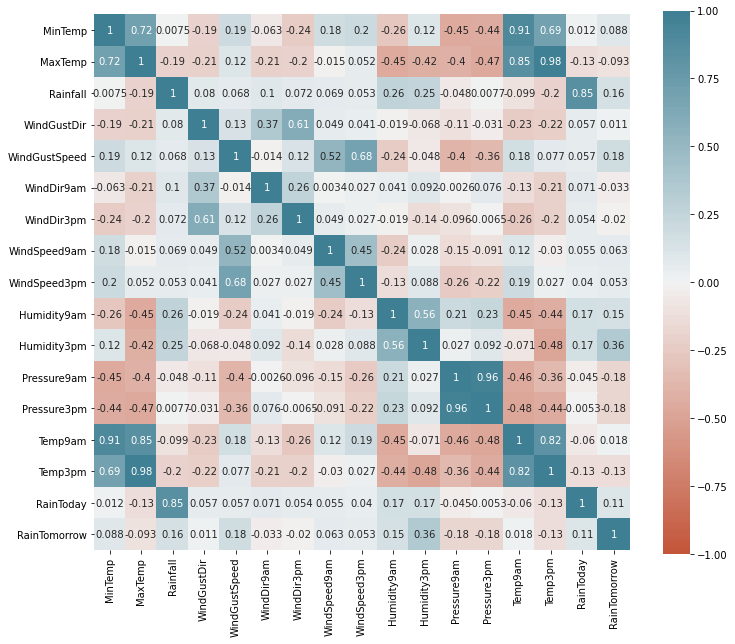

In [ ]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.figure(figsize=(12,10))
# Generate the heatmap
sns.heatmap(
 cor,
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 annot = True
)

In [ ]:
# Select features above a correlation threshold to target
# Correlation with target
# Apply abs() to get the absolute value so no need to deal with negative correlations
cor_target = abs(cor['RainTomorrow'])
# Selecting highly correlated features
# Say we set the correlation threshold to 0.2
relevant_features = cor_target[cor_target > 0.2]
relevant_features

Humidity3pm     0.358726
RainTomorrow    1.000000
Name: RainTomorrow, dtype: float64

### Information Gain

In [ ]:
# Import SelectKBest and mutual_info_classif modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(mutual_info_classif, k = 3)
# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train, y_train)
selector.get_support(indices=True)

array([10, 11, 12], dtype=int64)

In this feature selection process, the chosen feature is Humidity3pm, Pressure9am, and Pressure3pm


### PCA

In [ ]:
# Import PCA
from sklearn.decomposition import PCA
# Specify the number of components = 2
pca = PCA(n_components = 3)
# Generate the principal components
pca.fit(x_train)
# Transform the training set into principal components
train_pca = pca.transform(x_train)
# Transform the test set into principal components
test_pca = pca.transform(x_test)
# Convert train set into a data frame to make it easier to view
principalDf = pd.DataFrame(data = train_pca, \
 columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,28.327543,-8.228413,11.919164
1,-20.482308,1.455916,-5.364180
2,-33.020409,-0.371373,-19.495232
3,-9.416729,17.912233,-17.426187
4,18.774248,14.621571,2.263892
...,...,...,...
48755,5.299748,11.560309,8.125660
48756,3.839970,13.413648,-8.948854
48757,2.879938,16.053257,17.593457
48758,19.531493,-11.006578,2.876822


In [ ]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
99587,7.1,27.3,0.0,8,39.0,0,0,28.0,24.0,57.0,21.0,1026.2,1022.8,15.0,26.3,0
22079,13.9,19.8,0.0,13,28.0,15,13,15.0,20.0,73.0,70.0,1021.1,1019.9,18.1,19.3,0
43573,17.8,25.2,0.0,5,22.0,10,4,9.0,15.0,81.0,81.0,1022.5,1017.7,19.5,21.0,0
94486,20.9,30.7,0.0,4,37.0,9,1,11.0,28.0,67.0,69.0,1014.9,1011.5,27.8,28.2,0
79133,13.5,27.8,0.0,3,56.0,4,3,13.0,22.0,54.0,42.0,1015.5,1009.7,20.7,26.7,0


In [ ]:
print('Explained variance by component: ', pca.explained_variance_ratio_)

Explained variance by component:  [0.44783596 0.20281239 0.11571344]


## Without Feature Selecting KNN

In [ ]:
# Create a KNN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors = 24)
# Train the model using the training set
knn.fit(x_train, y_train)
# Predict the target for the development set
dev_predict = knn.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.8660487244688705


In [ ]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, dev_predict))

# Print precision, recall and F1
print(classification_report(y_test, dev_predict))

[[9997  174]
 [1459  561]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     10171
           1       0.76      0.28      0.41      2020

    accuracy                           0.87     12191
   macro avg       0.82      0.63      0.67     12191
weighted avg       0.85      0.87      0.84     12191



## With Feature Selection

### Variance Threshold

In [ ]:
# Training a decision tree model
vt = rain_new[[ 'WindGustSpeed' ,'Humidity9am' , 'Humidity3pm' ,'RainTomorrow']]

target = vt['RainTomorrow']
features = vt.drop('RainTomorrow', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)


knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(x_train, y_train)
dev_predict = knn.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dev_predict))
print(classification_report(y_test, dev_predict))

Accuracy:  0.8596505618899188
[[9977  194]
 [1517  503]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     10171
           1       0.72      0.25      0.37      2020

    accuracy                           0.86     12191
   macro avg       0.79      0.61      0.65     12191
weighted avg       0.84      0.86      0.83     12191



### Correlation Coefficient

In [ ]:
# Training a decision tree model
cc = rain_new[['Humidity3pm' ,'RainTomorrow']]

target = cc['RainTomorrow']
features = cc.drop('RainTomorrow', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)


knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(x_train, y_train)
dev_predict = knn.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dev_predict))
print(classification_report(y_test, dev_predict))

Accuracy:  0.8528422606841112
[[10000   171]
 [ 1623   397]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     10171
           1       0.70      0.20      0.31      2020

    accuracy                           0.85     12191
   macro avg       0.78      0.59      0.61     12191
weighted avg       0.83      0.85      0.82     12191



### Information Gain

In [ ]:
# Training a decision tree model
ig = rain_new[['Humidity3pm', 'Pressure9am' , 'Pressure3pm','RainTomorrow']]

target = ig['RainTomorrow']
features = ig.drop('RainTomorrow', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)


knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(x_train, y_train)
dev_predict = knn.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dev_predict))
print(classification_report(y_test, dev_predict))




Accuracy:  0.8581740628332376
[[9966  205]
 [1524  496]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     10171
           1       0.71      0.25      0.36      2020

    accuracy                           0.86     12191
   macro avg       0.79      0.61      0.64     12191
weighted avg       0.84      0.86      0.83     12191

